# Video games Analysis

**GitHub link:**
https://github.com/CCT-Dublin/data-visualisation-techniques-ca1-DanielaBarreto2023278.git

To start this project, I will gather at the beginning all the libraries used to manipulate data and create visualizations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import missingno as msno
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import KNNImputer
import plotly.express as px
from wordcloud import WordCloud
from scipy.stats import sem
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
import scikit_posthocs as sp
from tabulate import tabulate
sns.set()

I opted not to use the "warnings.filterwarnings" function to suppress alerts. Some can be useful during my analysis, providing important information about potential code issues.

# EDA

### Importing dataset and knowing data structure

The method 'pd.read_csv' was used to access the CSV file containing the dataset. Then, I used the method '.head()' to visualize the data, followed by the method '.shape' to determine the dataset size. I found that this dataset has 16719 rows and 16 columns.

In [2]:
df = pd.read_csv("vgsales.csv")
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(16719, 16)

The property '.dtypes' returns a Series with the data type of each column. Thus, we have seven object columns and nine floats.

In [4]:
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

The '.describe()' function generates descriptive statistics for the dataset, providing information about data distribution and variation, which is important for understanding the data's characteristics in the EDA phase.

Comparing the mean and median values (50% values) revealed a skewed distribution in all columns and also presented considerable variation.

If I were to apply this data to most machine learning models, I would have to preprocess the data using standardization, as the data has significant variation that can contribute to inaccurate predictions. However, this is not the case. In this project, I will maintain the data as it comes, but when appropriate, I will opt for the most suitable statistical approach, such as non-parametric statistical tests, as the data is not normally distributed.

In [5]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


## Cleaning data

#####  Check for leading or trailing whitespaces
This step is essential to certify that the data is consistent and standardized to ensure data quality because whitespace can result in another record. For example, 'candy' is different from 'candy ', and this difference can result in another group when filtering or grouping the data, leading to unreliable results. To solve this problem, I will use the '.applymap()' function, called the lambda function, and apply '.strip()' in strings with leading and trailing whitespaces and remove them. Otherwise, no change will be made.

In [6]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

##### Transforming the text in lowercase
'Morning', 'morning', and 'MORNING' are considered three records that are different from each other and can lead to mistaken information. I will solve this problem by transforming all text to lowercase, using a lambda and '.lower()' function that convert all strings into lowercase. Otherwise, everything will remain the same.

In [7]:
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

In [8]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,wii sports,wii,2006.0,sports,nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,nintendo,e
1,super mario bros.,nes,1985.0,platform,nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,nintendo,e
3,wii sports resort,wii,2009.0,sports,nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,nintendo,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


### Checking for missing values

I will check for missing values to ensure the reliability of the data used in statistical tests and visualizations, facilitating accurate data interpretation.

I used the '.info()' method to show that this data contains missing values.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


The method 'miss_val_formats' calls a list of strings containing possible formats that might be used to indicate missing or invalid data in the dataset. Subsequently, the code below will search the entire dataset for any data matching the strings in the 'miss_val_formats' list, which may represent missing or invalid data. These identified values will then be replaced with 'NaN,' typically used to signify 'not a number,' commonly representing missing values in datasets.

In [10]:
miss_val_formats = ["n.a.", "?", "NA", "n/a", "na", "--"]

In [11]:
df = pd.read_csv("vgsales.csv", na_values=miss_val_formats)

I used the '.isnull().sum()' method to check for missing values (null and NaN). It indicated a substantial number of missing values in the dataset, amounting to approximately 40%. Given the significance of this proportion across the entire dataset, I will need to imput these values.

In [12]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [13]:
new_df = df.dropna(axis=0)

In [14]:
new_df.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

In [15]:
new_df.shape

(6825, 16)

I checked for duplicates using the '.duplicated().sum()' tool, and there were no duplicates in this dataset.

In [16]:
df.duplicated().sum()

0

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [18]:
df["User_Score"].value_counts()

tbd    2425
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: User_Score, Length: 96, dtype: int64

Above I checked the '.info()' again and noticed that the variable 'User_Score' contains data labeled as 'tbd', which is causing this feature to be recognized as an object type instead of a float. I will convert these 'tbd' values to 'NaN' to change this variable to a float type. Then, I will apply interpolation, which can only be used with numerical features ('Critic_Score', 'Critic_Count', 'User_Score', and 'User_Count').

In [19]:
miss_val_formats = ["tbd"]

In [20]:
df = pd.read_csv("vgsales.csv", na_values=miss_val_formats)

In [21]:
df["User_Score"].value_counts()

7.8    324
8.0    290
8.2    282
8.3    254
8.5    253
      ... 
1.5      2
0.3      2
1.1      2
0.0      1
9.7      1
Name: User_Score, Length: 95, dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [23]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df.shape

(16719, 16)

Before commencing the imputation process, I will review the missing values that do not significantly affect the dataset. These values correspond for only 1.8% of the dataset across the following features: "Name," "Year_of_Release," "Genre," and "Publisher." While "Year_of_Release" is a numerical feature, the others are categorical. Therefore, points cannot be imputed using interpolation.

As for the "Year_of_Release," I have opted to remove its missing values since they constitute an insignificant portion, and imputing them may yield unreliable results.

In [25]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [26]:
df1 = df.dropna(axis=0, subset=["Name", "Year_of_Release", "Genre", "Publisher"])

In [27]:
df1.isnull().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8434
Critic_Count       8434
User_Score         8955
User_Count         8955
Developer          6512
Rating             6649
dtype: int64

In [28]:
df1.shape

(16416, 16)

### Checking for outliers

Based on my previous observations, this dataset appears skewed, suggesting the presence of potential outliers. To assess this, I will calculate the Interquartile Range (IQR) using the first and third quartile values. Subsequently, I will employ a boxplot graphic to visualize the outliers. Finally, I will identify and, if necessary, remove any outliers that do not compromise the integrity of the dataset.

I am using the Seaborn library to create box plots (or box-and-whisker plots) visualizations. This type of chart provides a better representation because it shows the distribution of quantitative data within the dataset's quartiles and 'outliers,' and also allows comparisons between features (seaborn.pydata.org, n.d.). 

In [29]:
Q1 = df1.quantile(0.25, numeric_only=True)
Q3 = df1.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

In [30]:
df2 = df1[~((df1<(Q1-1.5*IQR))|(df1>Q3+1.5*IQR)).any(axis=1)]
df2.shape

C:\Users\danie\AppData\Local\Temp\ipykernel_54216\1587481724.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df2 = df1[~((df1<(Q1-1.5*IQR))|(df1>Q3+1.5*IQR)).any(axis=1)]


(10960, 16)

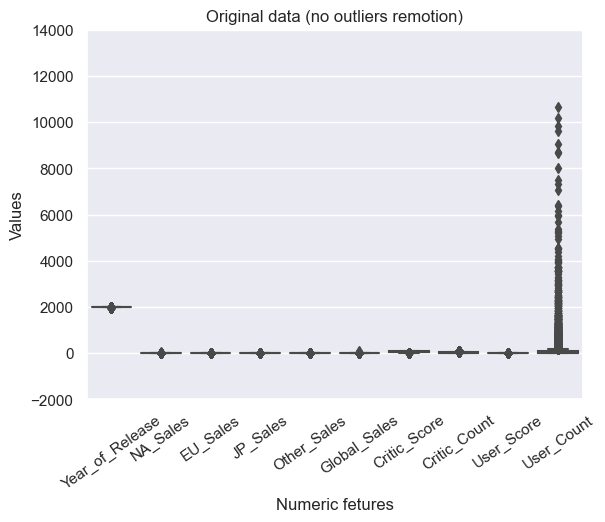

In [31]:
sns.boxplot(data=df1)
plt.ylim(bottom=-2000, top=14000)
plt.title('Original data (no outliers remotion)')
plt.xlabel('Numeric fetures')
plt.ylabel('Values')
plt.xticks(rotation=35)
plt.show()

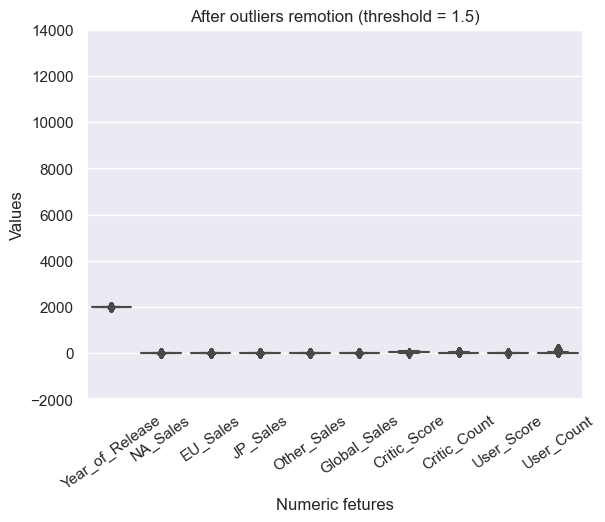

In [32]:
sns.boxplot(data=df2)
plt.ylim(bottom=-2000, top=14000)
plt.title('After outliers remotion (threshold = 1.5)')
plt.xlabel('Numeric fetures')
plt.ylabel('Values')
plt.xticks(rotation=35)
plt.show()

After applying the threshold of 1.5 to remove these outliers, I would miss approximately 32% of the data. This is a considerable amount that compromise the integrity of the data. This occurrence only affected the variable 'User_Count,' which I need to be careful with when working with it. Therefore, I will not remove outliers.

### Data imputation - Numerical features

Evaluating the descriptive statistics is possible to see that the data is skewed. But I will verify it with the visualizations because I need to confirm whether I will replace the missing values with mean, median, or even interpolation values. When the data has a normal distribution I can replace the values with mean; otherwise, I must use median or interpolation.

Histograms are used to visualize the distribution of data for one or more features by counting the number of observations (seaborn.pydata.org, n.d.). I also added the kernel density estimate (KDE) to smooth the histogram, because it provides complementary information about the shape of the distribution (seaborn.pydata.org, n.d.).

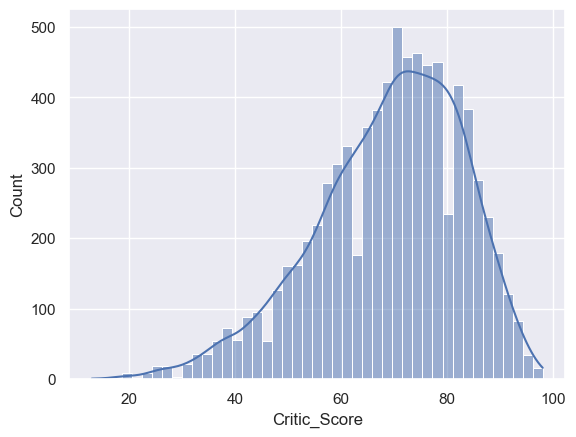

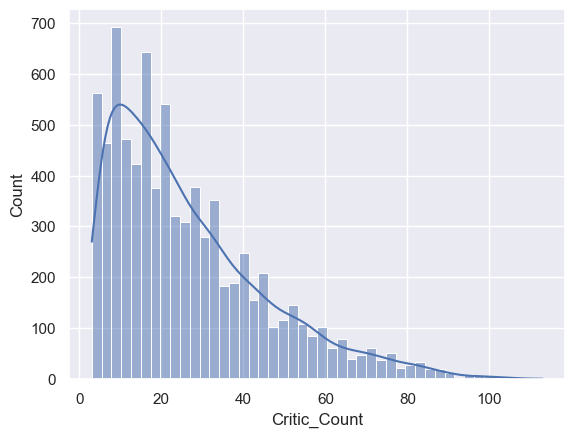

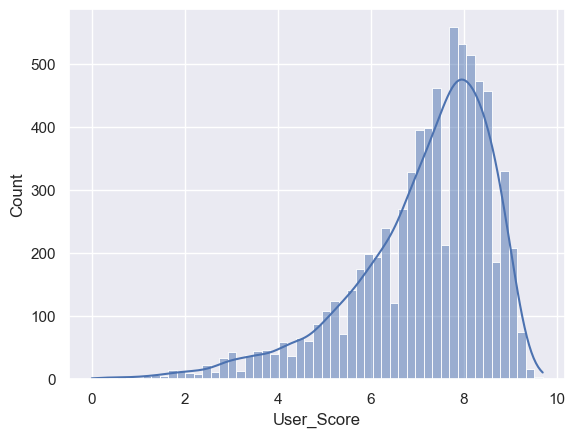

In [33]:
sns.histplot(data=df1, x="Critic_Score", kde=True)
plt.show()

sns.histplot(data=df1, x="Critic_Count", kde=True)
plt.show()

sns.histplot(data=df1, x="User_Score", kde=True)
plt.show()

In the chat belllow I used the log_scale tool to facilitate the visualition of the distribution because the scale was large (min: 4.00, max: 10665.00)

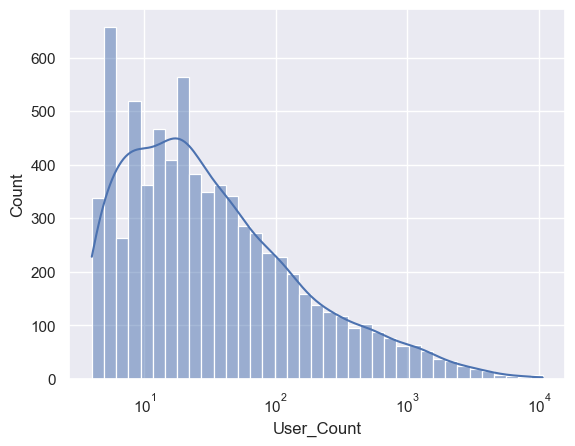

In [34]:
sns.histplot(data=df1, x="User_Count", log_scale=True, kde=True)
plt.show()

The histograms confirmed that these features are skewed, and the boxplot showed the presence of outliers in these features. Thus, in this case, I will input the missing values with interpolation because this method is more robust to outliers than the median. In addtion the imputation with mean is suitable when the data has normal distribution.

Below, I will apply interpolation in the following features: 'Critic_Score', 'Critic_Count', 'User_Score', and 'User_Count'.

In [35]:
df1.isnull().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8434
Critic_Count       8434
User_Score         8955
User_Count         8955
Developer          6512
Rating             6649
dtype: int64

In [36]:
df_int = df1.interpolate(method="linear", axix=0, subset=["Critic_Score", "Critic_Count", "User_Score", "User_Count"])

In [37]:
df_int.isnull().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score            0
User_Count            0
Developer          6512
Rating             6649
dtype: int64

In [38]:
df_int.shape

(16416, 16)

### Data imputation - Categorical features

The features 'Developer' and 'Rating' are categorical and will need special attention in the imputation process because this process differs from the numerical data. Is typically used the mode to impute categorical data (Stef van Buuren, 2018, p.12), but there are other options, such as using a predictive model to estimate the missing values (Troyanskaya et al., 2001).  

Before starting the imputation, I will check if the missing values are random using the library Missingno, which provides a better graphical representation. They are randomly distributed.

<Axes: >

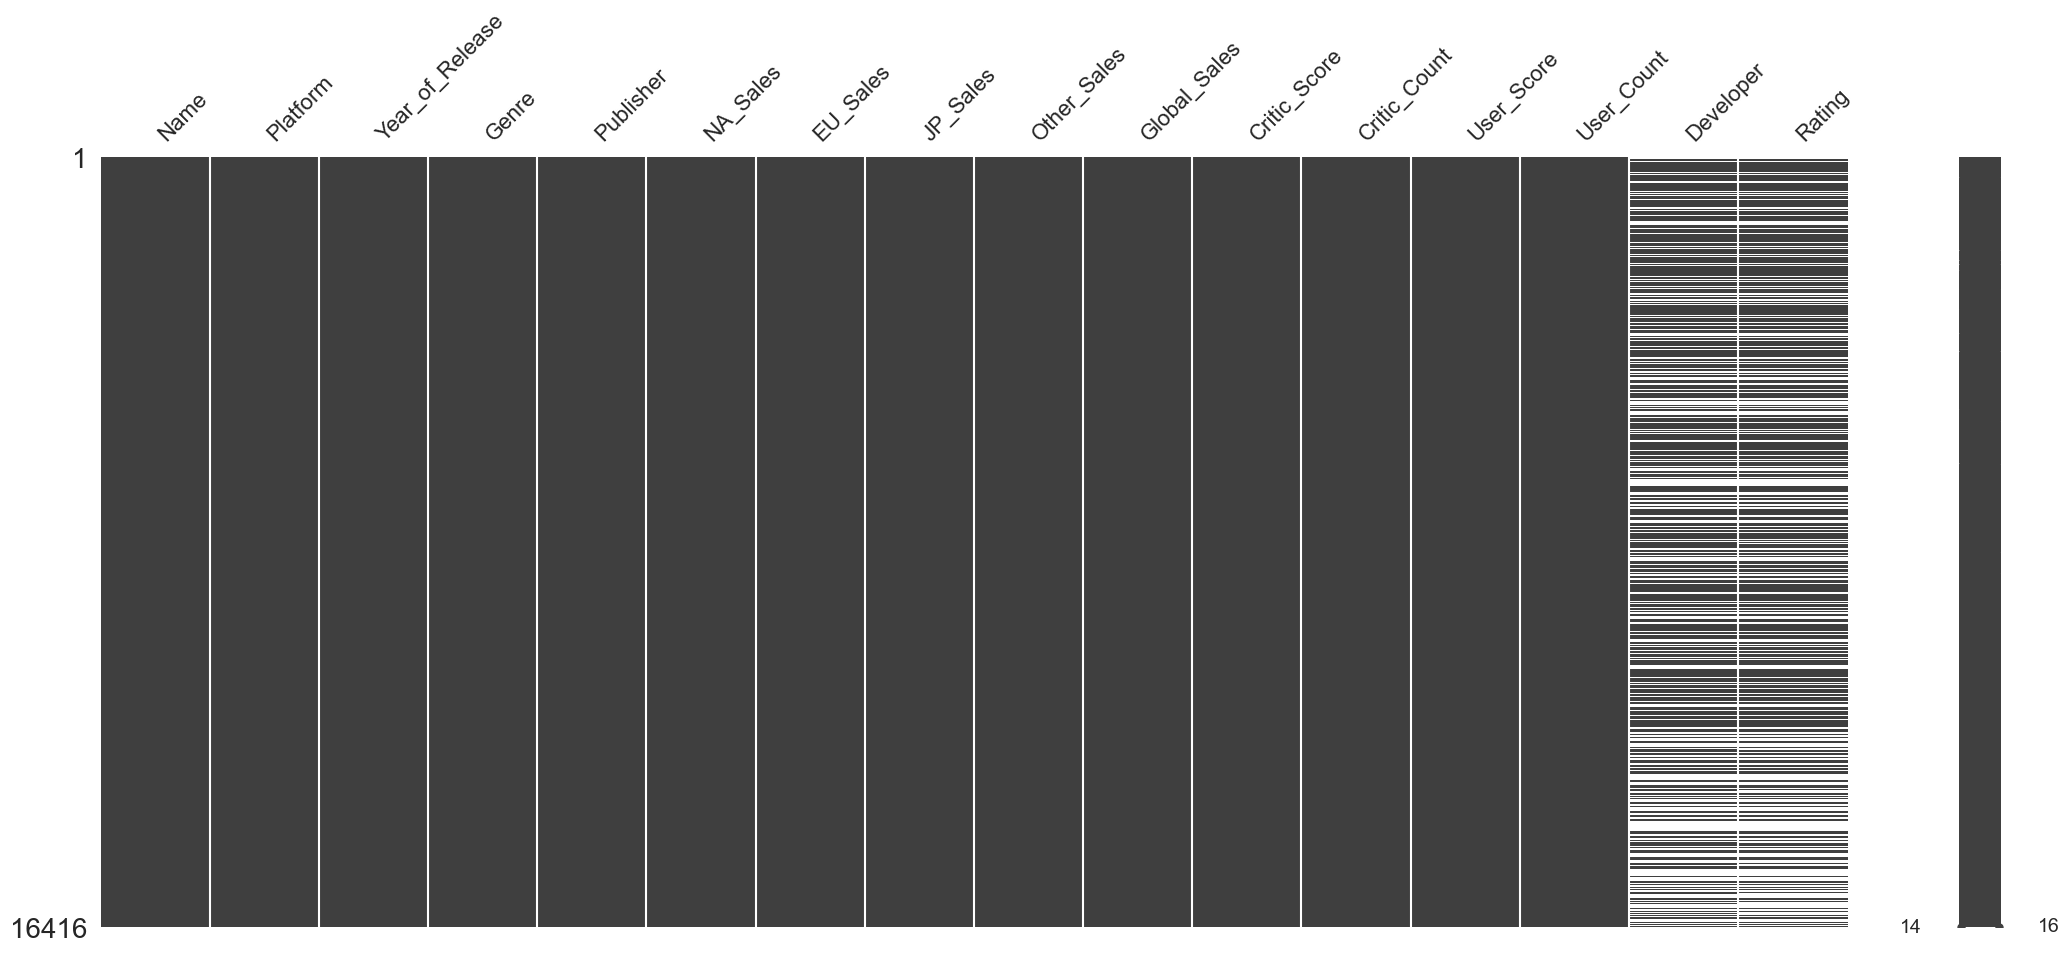

In [39]:
msno.matrix(df_int)

In this case, I opted to use the predictive model to estimate the missing values to experiment with this method. I will use nearest neighbor imputation from the Scikit-learning library, which is based on the Euclidean distance metric that supports missing values by finding the nearest neighbors using the KNNImputer class (Troyanskaya et al., 2001, scikit-learn, n.d.).

Considering that this model does not handle categorical data directly, I have to encode the data to transform it into numerical data, and I will use the OrdinalEncoder class from Scikit-learning library to do it. 

In [40]:
encoder = OrdinalEncoder()
df_int[['Developer_encoded', 'Rating_encoded']] = encoder.fit_transform(df_int[['Developer', 'Rating']])

Now, the data can be used in the KNN model. First, I defined the list of columns I wanted to use for the imputation. Then, I called the KNNImputer classifier to impute the missing values considering 2 nearest neighbors for it. 
The KNNImputer is fitted, and the df_filled contains the missing values imputed.

In [41]:
features_for_imputation = ['Developer_encoded', 'Rating_encoded']

In [42]:
imputer = KNNImputer(n_neighbors=2)
df_filled = imputer.fit_transform(df_int[features_for_imputation])

I used the 'inverse_transform' method to convert the numerical imputed back to the categorical data, creating new columns ('Developer_filled', 'Rating_filled').

In [43]:
df_int[['Developer_filled', 'Rating_filled']] = encoder.inverse_transform(df_filled)

In [44]:
print(df_filled)

[[1.00800000e+03 1.00000000e+00]
 [8.35050081e+02 3.55861575e+00]
 [1.00800000e+03 1.00000000e+00]
 ...
 [8.35050081e+02 3.55861575e+00]
 [8.35050081e+02 3.55861575e+00]
 [8.35050081e+02 3.55861575e+00]]


The chart below shows the columns 'Developer_filled' and 'Rating_filled' with the missing values already imputed.

<Axes: >

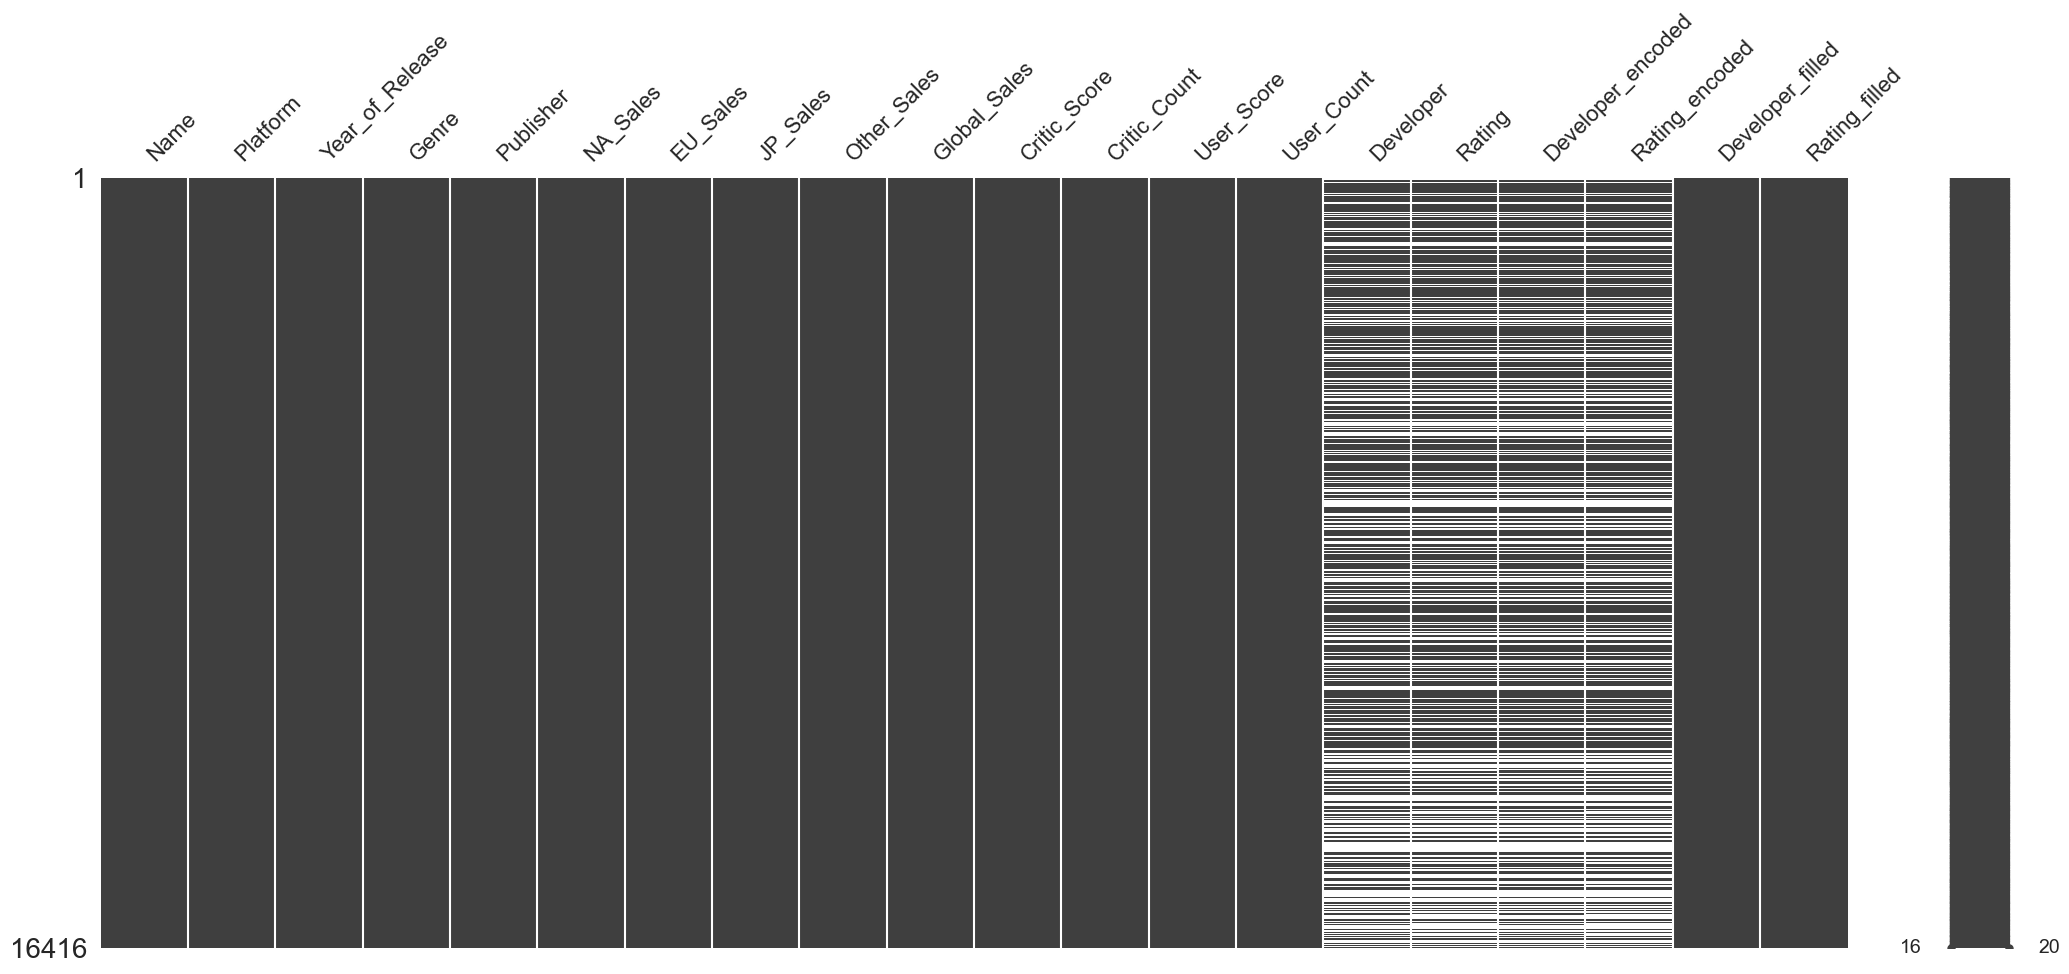

In [45]:
msno.matrix(df_int)

I dropped the columns with the missing values ("Developer" and "Rating") and the columns encoded ("Developer_encoded" and "Rating_encoded").

In [46]:
df_int = df_int.drop(["Developer", "Rating", "Developer_encoded", "Rating_encoded"], axis="columns")

In [47]:
df_int.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer_filled,Rating_filled
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.000000,8.000000,322.000000,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,79.0,62.000000,8.150000,515.500000,Lexis Numerique,EC
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.000000,8.300000,709.000000,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.000000,8.000000,192.000000,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,83.0,70.333333,8.166667,271.666667,Lexis Numerique,EC


<Axes: >

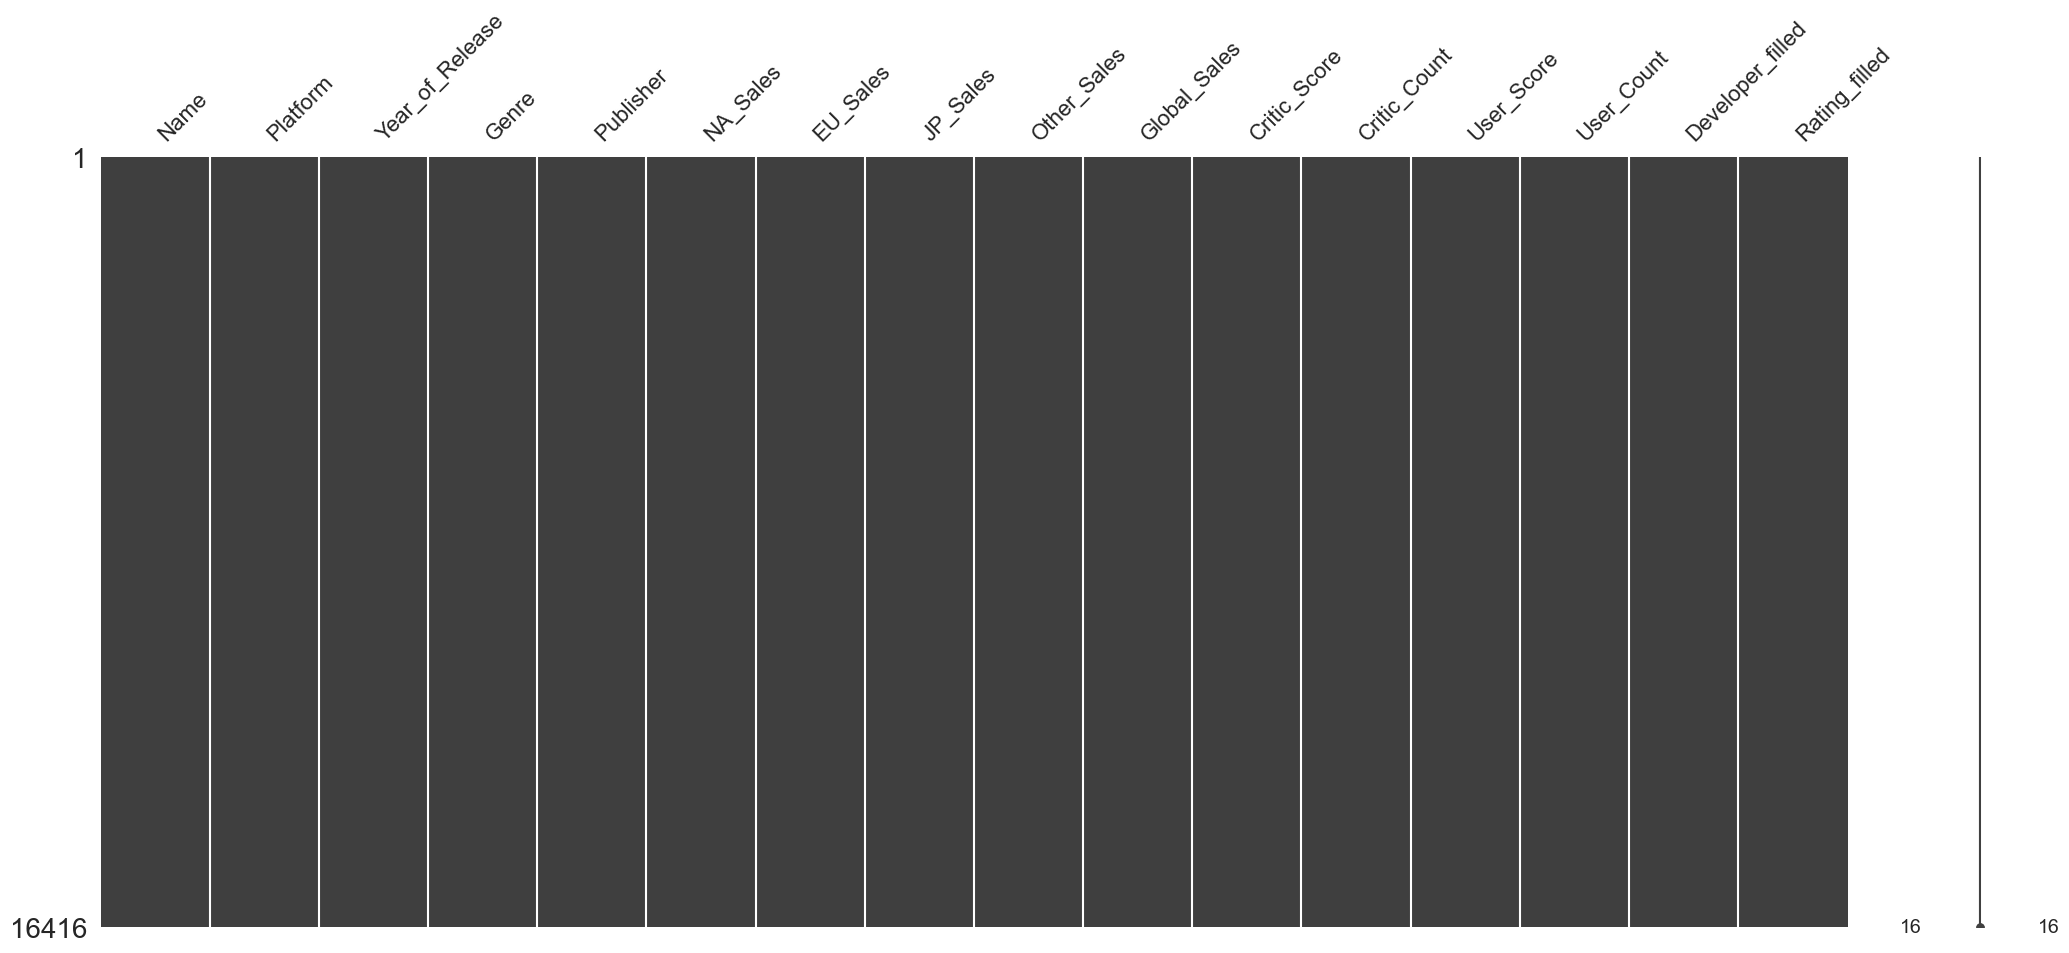

In [48]:
msno.matrix(df_int)

In [49]:
df_int.isnull().sum()

Name                0
Platform            0
Year_of_Release     0
Genre               0
Publisher           0
NA_Sales            0
EU_Sales            0
JP_Sales            0
Other_Sales         0
Global_Sales        0
Critic_Score        0
Critic_Count        0
User_Score          0
User_Count          0
Developer_filled    0
Rating_filled       0
dtype: int64

After completing this process, I realized that this method (KNNImputer) may not be reliable, considering that approximately 40% of the data is missing in each feature ('Developer' and 'Rating'). Furthermore, Troyanskaya et al. (2001) employed this method in datasets with a maximum of 20% missing values. Therefore, I chose not to utilize these features in the analysis, considering that even the most common imputation method with mode may result in unreliable imputation due to this significant amount of missing data.

### Relationships and trends

To visualize the data distribution and their relationships and trends, I will use the Seaborn library to access the pairplot function, which creates a grid of axes between each numerical variable (seaborn.pydata.org, n.d.). Additionally, I will utilize the heatmap function from the same library to identify the strength and direction of the relationships that might exist between the variables.

The first time, I applied these functions to all numerical variables. In the following phases, I will focus on specific variables.

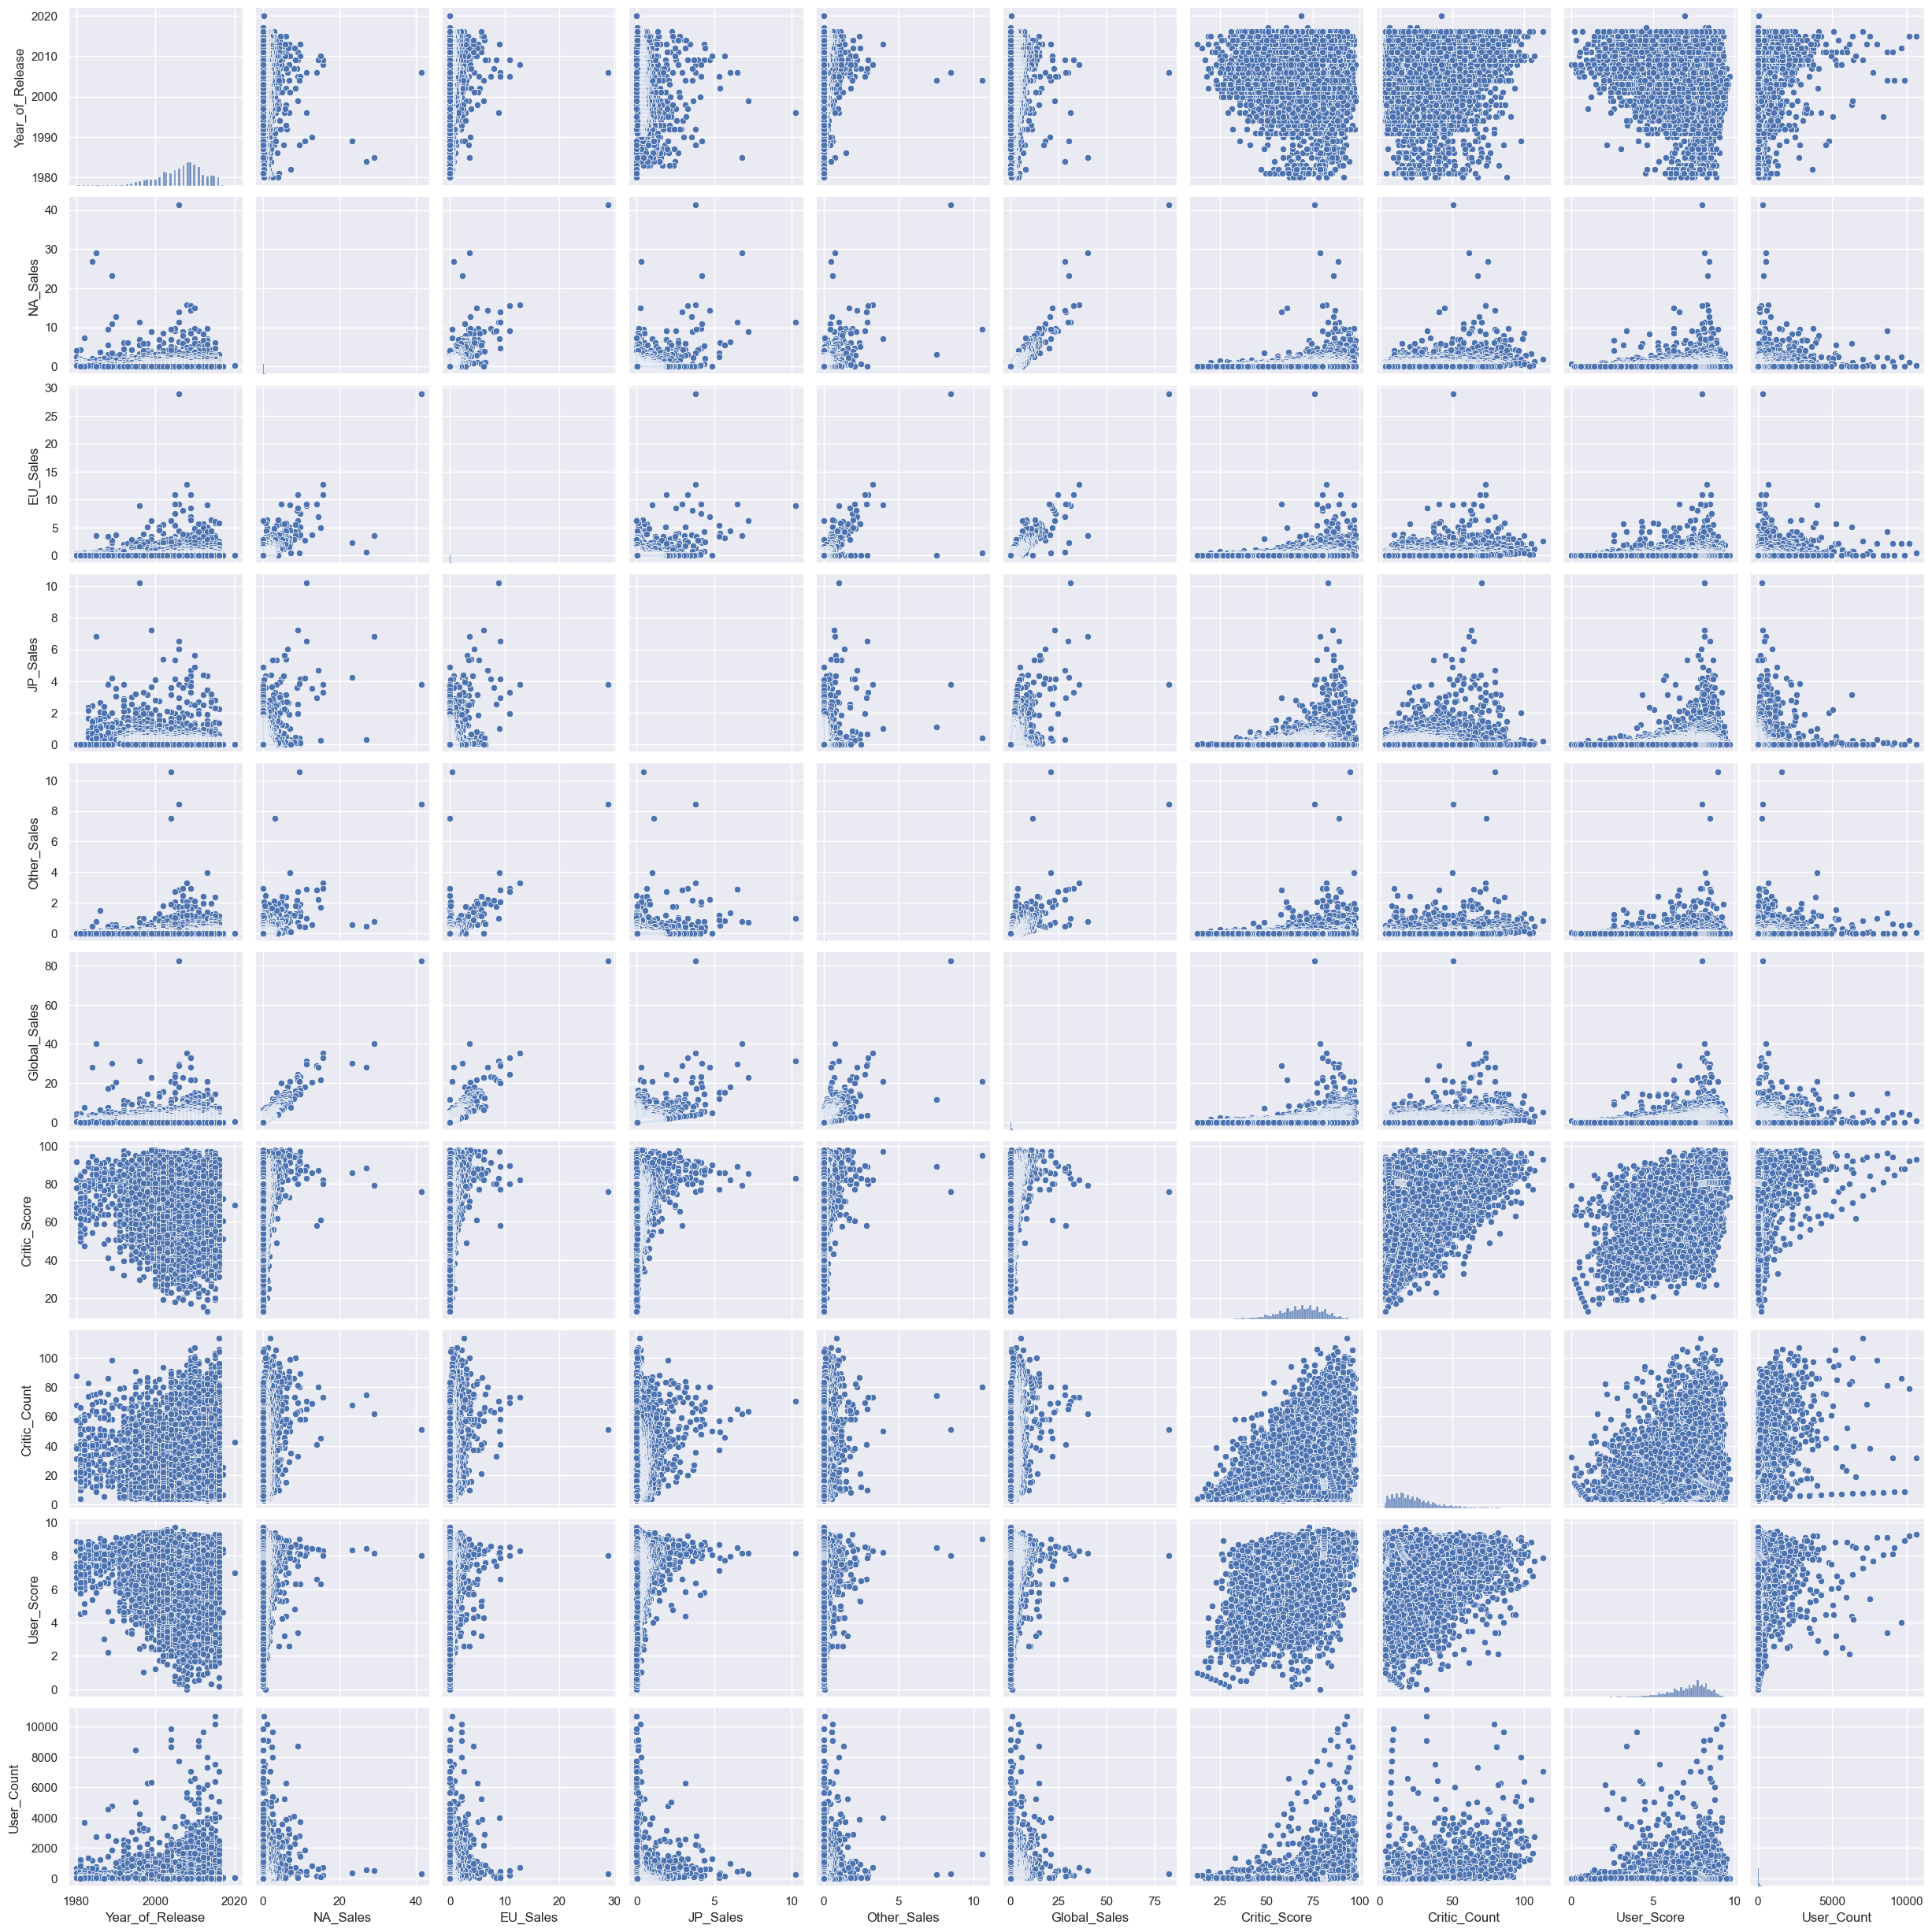

In [50]:
sns.pairplot(df_int)
plt.show()

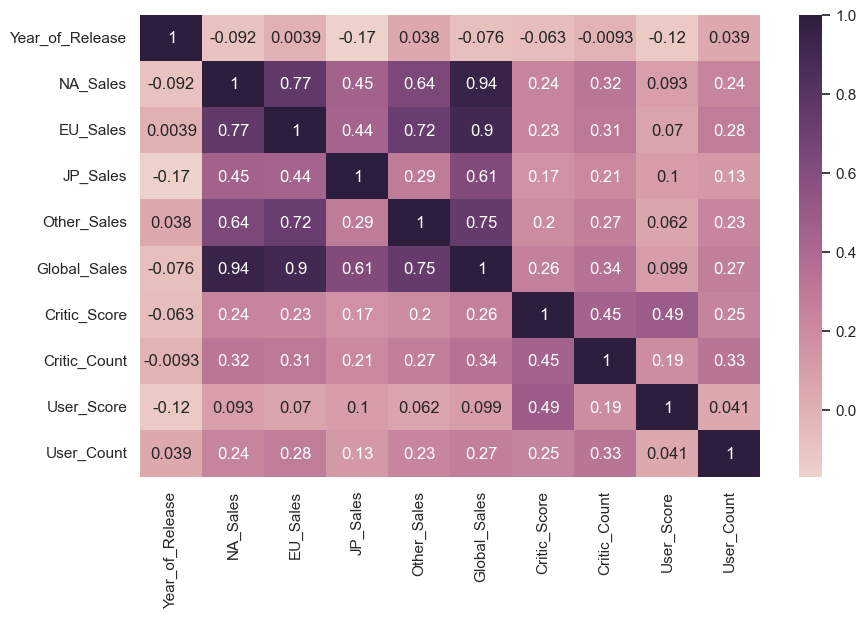

In [51]:
df_int_plot1 = df_int[["Year_of_Release", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales", "Critic_Score", "Critic_Count", "User_Score", "User_Count"]]
plt.figure(figsize=(10,6)) 
c= df_int_plot1.corr() 
sns.heatmap(c,cmap=sns.cubehelix_palette(as_cmap=True), annot=True)
plt.show()

As we can see above, the pair plot is showing some tendencies in variables related to sales (NA, EU, JP, Other), suggesting that there may be a linear correlation between these variables. Additionally, this can be confirmed by the heatmap results which clearly show the correlation between these variables, including other variables that were not clear in the pair plot.

Regarding the heatmap results, we can see that there is indeed a positive correlation between the sales variables. NA_sales versus Global_sales reaches 0.94, followed by EU_sales versus Global_sales with 0.9. These results suggest that these regions contribute the most to global sales.

Another interesting result is the moderate positive correlation (0.49) between 'Critic_Score' and 'User_Score,' which suggests that critics and users may share similar opinions when rating games, although not perfectly. This indicates that their ratings can be valuable for assessing user preferences and satisfaction more accurately.

# Visualizations

#### Transforming the text in lowercase and removing leading or trailing whitespaces

In [52]:
df_int = df_int.applymap(lambda x: x.lower() if isinstance(x, str) else x)

In [53]:
df_int = df_int.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [54]:
df_int.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer_filled,Rating_filled
0,wii sports,wii,2006.0,sports,nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.000000,8.000000,322.000000,nintendo,e
1,super mario bros.,nes,1985.0,platform,nintendo,29.08,3.58,6.81,0.77,40.24,79.0,62.000000,8.150000,515.500000,lexis numerique,ec
2,mario kart wii,wii,2008.0,racing,nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.000000,8.300000,709.000000,nintendo,e
3,wii sports resort,wii,2009.0,sports,nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.000000,8.000000,192.000000,nintendo,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,nintendo,11.27,8.89,10.22,1.00,31.37,83.0,70.333333,8.166667,271.666667,lexis numerique,ec


# Part 1

### **•	What are the top 5 games by global sales?**

Before creating the visualization, it will be necessary to use the '.groupby()' function to group game names with the values of 'Global_Sales'. Thus, this function grouped the 'Name' column in the dataset 'df_int'. Then, I used the '.sum()' function to calculate the total 'Global_Sales' for each group in the 'Name' column. 

In [55]:
games_global = df_int.groupby('Name')['Global_Sales'].sum()
games_global

Name
'98 koshien                                      0.41
.hack//g.u. vol.1//rebirth                       0.17
.hack//g.u. vol.2//reminisce                     0.23
.hack//g.u. vol.2//reminisce (jp sales)          0.16
.hack//g.u. vol.3//redemption                    0.17
                                                 ... 
zumba fitness rush                               0.18
zumba fitness: world party                       0.46
zwei!!                                           0.02
zyuden sentai kyoryuger: game de gaburincho!!    0.05
¡shin chan flipa en colores!                     0.14
Name: Global_Sales, Length: 11397, dtype: float64

Then I used the '.nlargest(5)' method to retrieve the five largest values of the 'games_global' variable.

In [56]:
top5_games_global = games_global.nlargest(5)
top5_games_global

Name
wii sports            82.53
grand theft auto v    56.57
super mario bros.     45.31
tetris                35.84
mario kart wii        35.52
Name: Global_Sales, dtype: float64

In this visualization, I utilized the Seaborn and Matplotlib.pyplot libraries to generate a bar chart, as this type is well-suited for representing quantities of variables with a reasonable number of categories (seaborn.pydata.org, n.d.; matplotlib.org, n.d.). I used horizontal bars because they are more often used to represent ranks, which aligns with this task's goal. But first, I assigned the parameters that were retrieved from the previous filter process to be able to use them in the chart.

I used the website below to get the color codes used in this project.

https://html-color.codes/blue.

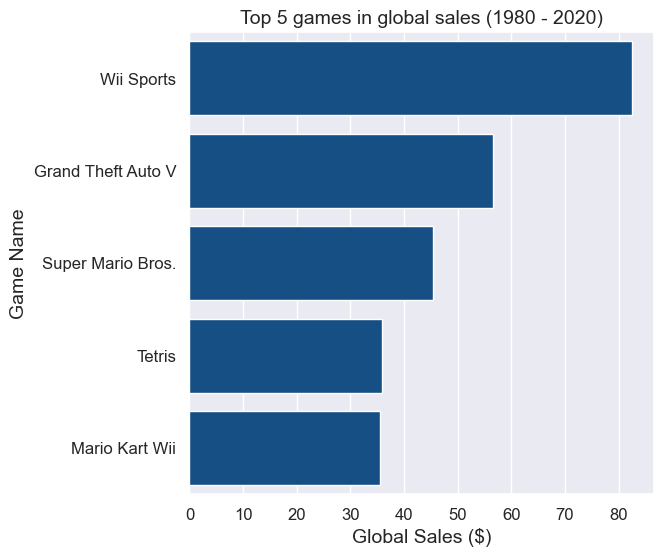

In [95]:
top5games = ["Wii Sports", "Grand Theft Auto V", "Super Mario Bros.", "Tetris", "Mario Kart Wii"]
sales = [82.53, 56.57, 45.31, 35.84, 35.52]

plt.figure(figsize=(6, 6))
ax = sns.barplot(x=sales, y=top5games, color="#035096")
plt.title('Top 5 games in global sales (1980 - 2020)', fontsize=14)
plt.xlabel('Global Sales ($)', fontsize=14)
plt.ylabel('Game Name', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**Question answer:**

According to the chart above, the top five-selling games in the world are Wii Sports, followed by Grand Theft Auto V, Super Mario Bros., Tetris, and Mario Kart Wii, and this result correspond to the period of 1980 to 2020.

---

### **• Is there a correlation between the “na_sales” and “jp_sales” for the years 2010-2014?**

I will filter the data for the years 2010-2014 before create the visualization. Using the >= 2010 sign, a boolean is created, marking each value >= 2010 as True; otherwise, it is marked as False. The same process occurs with the <= 2014 sign. This way, it is possible to store these True values in the 'filtered_data' dataset.

In [58]:
filtered_data = df_int[(df_int['Year_of_Release'] >= 2010) & (df_int['Year_of_Release'] <= 2014)]

I used Matplotlib.pyplot exclusively to create the scatter plot here, as this type is suitable only for quantitative variables and is useful for showing relationships between variables. It plots y *versus* x with varying marker size and/or color. I opted to maintain the same color for the data points to show unity, indicating that this visual is related to the previous one, according to the '9 Principles of Design'.

I used the alpha and edgecolor parameters to facilitate the audience in seeing the concentration of values, hence understanding the behavior of the sales correlation, as the transparency darkens with an increase in the number of points overlapping each other.

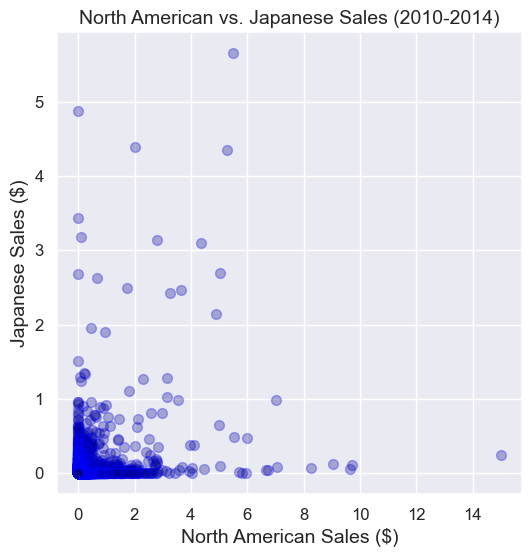

In [59]:
plt.figure(figsize=(6, 6))
plt.scatter(filtered_data['NA_Sales'], filtered_data['JP_Sales'], color='darkblue', alpha=0.3, s=50, edgecolors="blue")
plt.title('North American vs. Japanese Sales (2010-2014)',  fontdict={"fontsize":14})
plt.xlabel('North American Sales ($)',  fontdict={"fontsize":14})
plt.ylabel('Japanese Sales ($)',  fontdict={"fontsize":14})
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**Question answer:**

Only by looking at the chart, we can suggest a positive tendency between North American and Japanese sales, as both variables tend to increase. However, this relationship seems to be weak, as it did not result in a clear tendency toward the top-right of the chart.

To verify this information, I used the '.corr()' method, which calculates the correlation coefficient between the two variables, using the Pearson correlation coefficient. It resulted in 0.26, meaning that in fact, there is a weak positive correlation between North American and Japanese sales for the period of 2010 to 2014.

In [60]:
correlation = filtered_data['NA_Sales'].corr(filtered_data['JP_Sales'])
print(f"Correlation between North American and Japanese Sales (2010-2014): {correlation:.4f}")

Correlation between North American and Japanese Sales (2010-2014): 0.2604


---

### **• What is the distribution of the most popular 4 game genres?**

Here, I will use the '.value_counts()' function to obtain the occurrences for each genre. Then, I will use the .head() method to display the four highest values representing the most popular game genres.

In [61]:
genre_counts = df_int['Genre'].value_counts()
print(genre_counts)

action          3307
sports          2306
misc            1697
role-playing    1483
shooter         1296
adventure       1291
racing          1225
platform         878
simulation       855
fighting         837
strategy         672
puzzle           569
Name: Genre, dtype: int64


In [62]:
top_4_genres = genre_counts.head(4)
top_4_genres.head()

action          3307
sports          2306
misc            1697
role-playing    1483
Name: Genre, dtype: int64

Below, I converted the 'top_4_genres' into a DataFrame called 'df_top_4_genres' for visualization. I used the '.reset_index()' method to start the index from 0 and so on in the new dataset ('df_top_4_genres') because the index might lose its order after filtering or grouping processes.

In [63]:
df_top_4_genres = top_4_genres.reset_index()
df_top_4_genres.columns = ['Genre', 'Count']
df_top_4_genres.head()

,Genre,Count
0,action,3307
1,sports,2306
2,misc,1697
3,role-playing,1483


In this visualization, I utilized the Seaborn library with the '.catplot()' function to represent the four most popular game genres using a dot chart instead of a bar chart, as previously shown. Dot charts are typically employed to display numerical data, such as the frequency or count of each genre in the dataset. They are also effective for visualizing categorical data, as demonstrated in this case (seaborn.pydata.org, n.d.).

This choice introduces more variety among the charts, potentially maintaining the stakeholder's interest and engagement with the information, in accordance with the '9 Principles of Design'.

<Figure size 600x600 with 0 Axes>

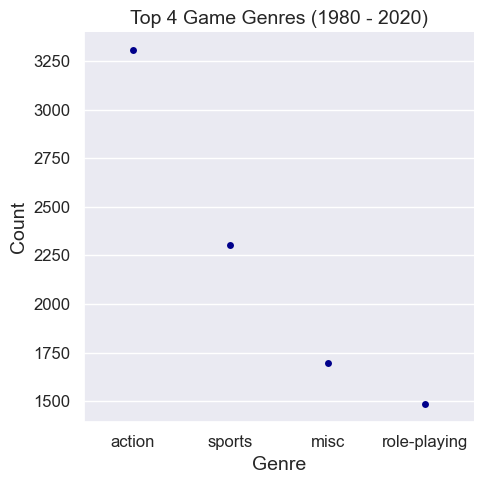

In [96]:
plt.figure(figsize=(6, 6))
sns.catplot(data=df_top_4_genres, x="Genre", y='Count', color="darkblue")
plt.title('Top 4 Game Genres (1980 - 2020)', fontdict={"fontsize":14})
plt.xlabel('Genre', fontdict={"fontsize":14})
plt.ylabel('Count', fontdict={"fontsize":14})
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

#### Game genre distribution

To generate the distribution plots, I opted to use the violin plot to increase the variety in this analysis while simultaneously communicating the distribution for each of the top genres and enhancing the comparison between them. To do this, I first created a subset for each group of the top four game genres using the '.groupby()' and '.get_group()' methods.

In [65]:
by_category = df_int.groupby('Genre')
subset_action = by_category.get_group('action')
subset_sports = by_category.get_group('sports')
subset_misc = by_category.get_group('misc')
subset_role_playing = by_category.get_group('role-playing')

I then extracted the data from the 'Year_of_Release' column for each subset and stored it in a new variable. This was done to represent the distribution of the release years for the top four genres.

In [66]:
data_action = subset_action['Year_of_Release']
data_sports = subset_sports['Year_of_Release']
data_misc = subset_misc['Year_of_Release']
data_role_playing = subset_role_playing['Year_of_Release']

I utilized the Seaborn and Matplotlib.pyplot libraries to generate a violin chart, which can be an approach to show distribution information in ways that facilitate comparisons across categorical variables (seaborn.pydata.org, n.d.; matplotlib.org, n.d.). I opted to use the same color for all genres to maintain analytical unity, ensuring consistency, but each genre is well-defined on the x-axis.

In a violin plot, the width of the 'violin' indicates the occurrence of the variable. For example, if the shape of the violin becomes narrower from 2010 onwards, it suggests a decreasing trend in the release frequency of these game genres over time.

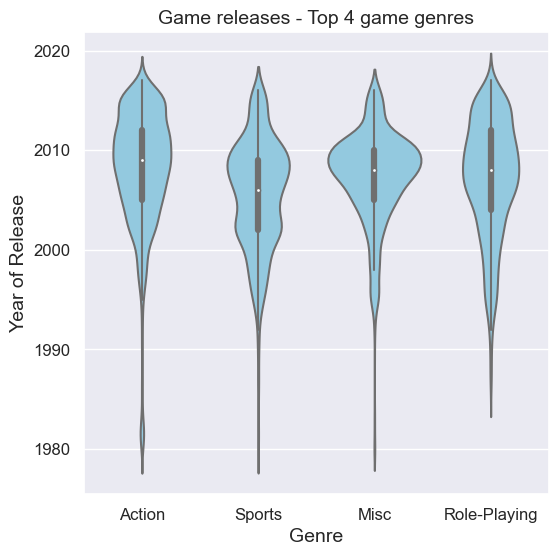

In [67]:
data = [data_action, data_sports, data_misc, data_role_playing]
labels = ['Action', 'Sports', 'Misc', 'Role-Playing']

plt.figure(figsize=(6, 6))
sns.violinplot(data=data, linewidth=1.5, color="skyblue")
plt.xlabel("Genre", fontdict={"fontsize":14})
plt.ylabel("Year of Release", fontdict={"fontsize":14})
plt.title("Game releases - Top 4 game genres", fontdict={"fontsize":14})
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(range(len(labels)), labels)
plt.show()

**Question answer:**

The first chart shows that the four most popular game genres are Action, with more than 3000 occurrences, followed by Sports, Misc, and Role-Playing. In addition, considering the violin plot (above) that shows the distribution of these top game genres, we can note a tendency of decrease for games released from 2010.

---

### **• Do older games (2005 and earlier) have a higher MEAN “eu_sales” than newer games (after 2005)?**

Before commencing the visualization process, I'll compute the mean and median of Europe sales for each specified period. Initially, I'll determine the average EU sales for older games (those released until 2005), followed by the average EU sales for newer games (those released after 2005).

I employed the '<= 2005' condition to identify games released until 2005 and the '> 2005' condition for those released after. This methodology generates a boolean mask, assigning 'True' to values that meet the condition and 'False' otherwise. Subsequently, utilizing the '.mean()' function, I calculated the average Europe sales for each period.

In [68]:
oldgames_mean = df_int[df_int['Year_of_Release'] <= 2005]['EU_Sales'].mean()
newgames_mean = df_int[df_int['Year_of_Release'] > 2005]['EU_Sales'].mean()
print(f"Mean EU sales for older games (up to 2005): {oldgames_mean:.4f}")
print(f"Mean EU sales for newer games (after 2005): {newgames_mean:.4f}")

Mean EU sales for older games (up to 2005): 0.1482
Mean EU sales for newer games (after 2005): 0.1448


Then, I used the '.median()' function to calculate the median for both periods. I opted to use the median because the data is skewed and does not have a normal distribution. In this case, the median tends to be a more reliable measure of the central tendency of the dataset.

In [69]:
oldgames_median = df_int[df_int['Year_of_Release'] <= 2005]['EU_Sales'].median()
newgames_median = df_int[df_int['Year_of_Release'] > 2005]['EU_Sales'].median()

print(f"Median EU sales for older games (up to 2005): {oldgames_median:.4f}")
print(f"Median EU sales for newer games (after 2005): {newgames_median:.4f}")

Median EU sales for older games (up to 2005): 0.0400
Median EU sales for newer games (after 2005): 0.0100


Below is presented a grouped bar chart using the Matplotlib.pyplot library to represent the means and medians of Europe sales for both periods, up to 2005 and after 2005. I opted to use this chart here because this type is very intuitive, making the comparisons straightforward for anyone. Additionally, I maintained the same color scheme with only a modification in the hue to differentiate between means and medians.

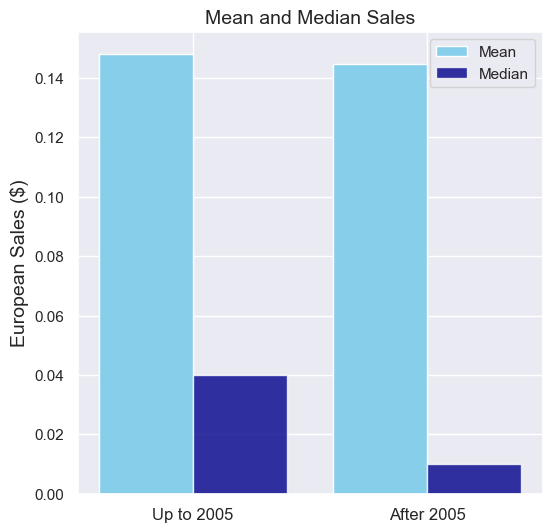

In [70]:
labels = ['Up to 2005', 'After 2005']
mean_sales = [oldgames_mean, newgames_mean]
median_sales = [oldgames_median, newgames_median]

x = np.arange(len(labels))

plt.figure(figsize=(6, 6))
plt.bar(x - 0.2, mean_sales, width=0.4, label='Mean', color='skyblue')
plt.bar(x + 0.2, median_sales, width=0.4, label='Median', color='darkblue', alpha=0.8)

plt.title('Mean and Median Sales', fontdict={"fontsize":14})
plt.ylabel('European Sales ($)', fontdict={"fontsize":14})
plt.xticks(x, labels, fontdict={"fontsize":12})
plt.legend(loc='upper right')
plt.show()

The graph above represents similar averages, but the medians highlight that there is a difference. Considering that the data is skewed and lacks a normal distribution, the mean results may not provide a reliable measure of the difference between these periods. Therefore, the median results tend to be more reliable in this situation because they are less influenced by extreme values (skewness in the data).

The Mann-Whitney U test is a non-parametric statistical test used to compare whether there is a statistically significant difference between the distribution of two groups, using specialy medians. I opted to use this test because I cannot assume a normal distribution as the dataset is skewed.

I used the Scipy library and the 'mannwhitneyu()' function to perform this statistical test (docs.scipy.org, n.d.).

*State the hypothesis:*
    
- $H_0$: There is no difference between the medians.

- $H_A$: There is difference between the medians. 

In [71]:
statistic, p_value = mannwhitneyu(
    df_int[df_int['Year_of_Release'] <= 2005]['EU_Sales'],
    df_int[df_int['Year_of_Release'] > 2005]['EU_Sales']
)

print("Mann-Whitney U statistic:", statistic)
print("p-value:", p_value)

Mann-Whitney U statistic: 37073181.0
p-value: 4.1925977844497935e-86


**Question answer:**

Since the p-value is significantly less than 0.05, I can reject the null hypothesis. Therefore, there is strong evidence to suggest that the sales up to 2005 were higher than the sales after 2005 with a statistically significant difference.

Regarding the mean and median results, there were more sales before 2005 than after. However, only the median results can be considered reliable, given the dataset's non-normal distribution and skewness.

---

### **• What are the 3 most common “developer” in the dataset?**

Considering the 'Developer' variable has a significant amount of missing data (approximately 40% of the this feature), I opted not to use any imputation method because it can result in unreliable results. Since the variable 'Developer' has no relationship with another one, I cannot even estimate the records in this feature using another one. With this in mind, I created a new dataframe called 'df_dev', where I only copied the variable 'Developer' from the original dataset (df). Then, I used the '.fillna()' method to replace the missing values with the word 'Unknown', creating a new category that will identify and highlight the necessity of updating these records. 

In [72]:
df_dev = pd.DataFrame()
df_dev['Developer'] = df['Developer'].copy()
df_dev.head()

,Developer
0,Nintendo
1,NaN
2,Nintendo
3,Nintendo
4,NaN


In [73]:
df_dev['Developer'] = df_dev['Developer'].fillna('Unknown')
df_dev.head()

,Developer
0,Nintendo
1,Unknown
2,Nintendo
3,Nintendo
4,Unknown


As I did in the previous questions, I used the '.value_counts()' function to obtain the occurrences for each developer, providing valuable insights into the distribution of data within the 'Developer' variable, including the necessity of gathering the correct data for the unknown values.

In [74]:
dev_counts = df_dev['Developer'].value_counts()
top_3_devs = dev_counts.head(3)

In [75]:
dev_counts

Unknown                        6623
Ubisoft                         204
EA Sports                       172
EA Canada                       167
Konami                          162
                               ... 
Realmforge Studios                1
Sega, Tom Create                  1
Sarbakan Inc.                     1
Pacific Century Cyber Works       1
Interchannel-Holon                1
Name: Developer, Length: 1697, dtype: int64

I employed Matplotlib.pyplot and Wordcloud libraries to create a word cloud chart in this visualization (matplotlib.org, n.d.; PyPI, 2018). This visual representation describes the frequency of words, similar to a bar chart (Vu, 2023). This type of visualization increases audience engagement due to its unconventional nature and effectively highlights the most prevalent categories. As illustrated below, using all developer counts, followed by focusing on just the top three developers, both charts reveal the prominence of the “Unknown” category.

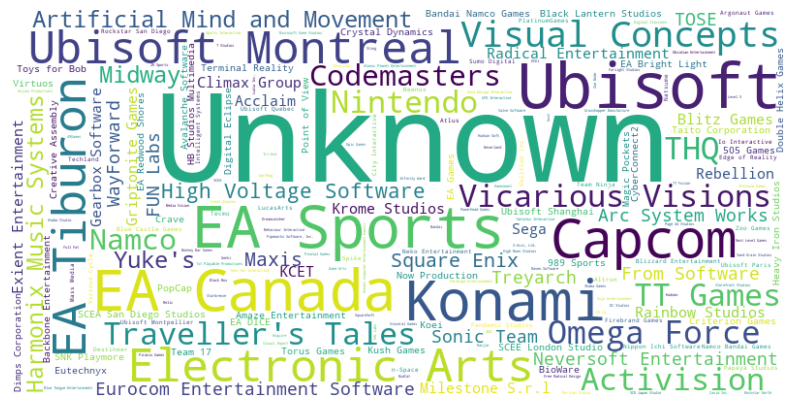

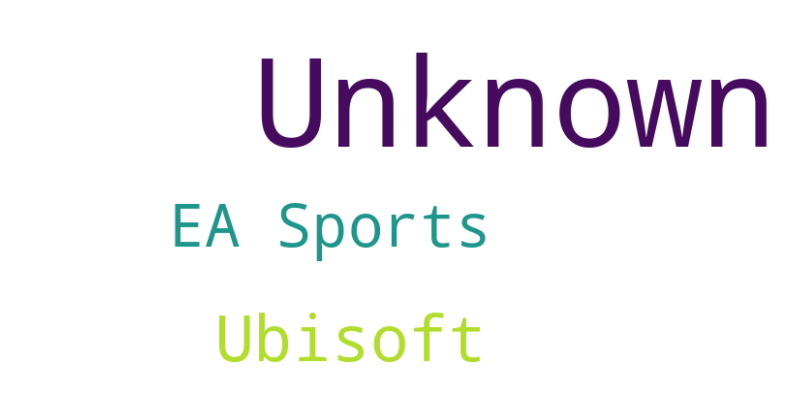

In [76]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dev_counts)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_3_devs)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Question answer:**

The three most common developers in the dataset are Unknown, Ubisoft, and EA Sports. The highlight here is that the category 'Unknown' corresponds to approximately 40% of this feature, indicating that this feature needs to be updated with reliable values. Therefore, considering this data, it is not possible to make inferences regarding this feature because of the amount of missing data.

---

# Part 2

### Question: What are the top 5 platforms by global sales from 2010 to 2020?

Since retail companies generally sell other products beyond games, such as platforms and consoles, to use those games, I presume this feature ('Platform') is essential to be assessed in this analysis, as this product can also increase game sales. Because of this, my question for this part will be...

**What are the top 5 platforms by global sales from 2010 to 2020?**

I chose this period because it contains the most up-to-date data in this dataset; the last record available is from 2020. Additionally, the answer to this question might help us identify products that could be sold in upcoming seasons. Understanding which platforms are selling the most can also inform us about compatible games and potential bundle opportunities.  

I started this task by filtering the data to get the records from 2010 to 2020.

In [77]:
df_from2010 = df_int[df_int['Year_of_Release'] >= 2010]
df_from2010.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer_filled,Rating_filled
14,kinect adventures!,x360,2010.0,misc,microsoft game studios,15.00,4.89,0.24,1.69,21.81,61.0,45.0,6.30,106.0,good science studio,e
16,grand theft auto v,ps3,2013.0,action,take-two interactive,7.02,9.09,0.98,3.96,21.04,97.0,50.0,8.20,3994.0,rockstar north,m
23,grand theft auto v,x360,2013.0,action,take-two interactive,9.66,5.14,0.06,1.41,16.27,97.0,58.0,8.10,3711.0,rockstar north,m
27,pokemon black/pokemon white,ds,2010.0,role-playing,nintendo,5.51,3.17,5.65,0.80,15.14,86.0,45.5,7.75,166.5,lexis numerique,ec
29,call of duty: modern warfare 3,x360,2011.0,shooter,activision,9.04,4.24,0.13,1.32,14.73,88.0,81.0,3.40,8713.0,"infinity ward, sledgehammer games",m


Here, I used the '.groupby()' function to group the 'Platform' column present in the dataset 'df_from2010'. Then, I used the '.sum()' function to calculate the total 'Global_Sales' for each group in the 'Platform' column. Finally, I stored this data in the variable 'platform_sales'.  

In [78]:
platform_sales = df_from2010.groupby('Platform')['Global_Sales'].sum()
platform_sales

Platform
3ds     257.92
ds      124.13
pc      121.91
ps2       6.10
ps3     587.69
ps4     314.23
psp      63.99
psv      53.82
wii     223.20
wiiu     82.16
x360    550.50
xone    159.44
Name: Global_Sales, dtype: float64

To obtain the top 5 platforms with the highest sales from 2010 to 2020, I used the '.nlargest(5)' method to retrieve the five largest values of the 'platform_sales' variable, and then the '.index' was used to retrieve the index labels of those values. 

In [79]:
top_platforms = platform_sales.nlargest(5).index
top_platforms

Index(['ps3', 'x360', 'ps4', '3ds', 'wii'], dtype='object', name='Platform')

Below, I used the '.isin()' method to check that each value in the 'Platform' column is included in the top_platforms variable.

In [80]:
filtered_data = df_from2010[df_from2010['Platform'].isin(top_platforms)]
filtered_data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer_filled,Rating_filled
14,kinect adventures!,x360,2010.0,misc,microsoft game studios,15.00,4.89,0.24,1.69,21.81,61.000000,45.000000,6.300000,106.000000,good science studio,e
16,grand theft auto v,ps3,2013.0,action,take-two interactive,7.02,9.09,0.98,3.96,21.04,97.000000,50.000000,8.200000,3994.000000,rockstar north,m
23,grand theft auto v,x360,2013.0,action,take-two interactive,9.66,5.14,0.06,1.41,16.27,97.000000,58.000000,8.100000,3711.000000,rockstar north,m
29,call of duty: modern warfare 3,x360,2011.0,shooter,activision,9.04,4.24,0.13,1.32,14.73,88.000000,81.000000,3.400000,8713.000000,"infinity ward, sledgehammer games",m
31,call of duty: black ops 3,ps4,2015.0,shooter,activision,6.03,5.86,0.36,2.38,14.63,87.333333,86.333333,5.333333,3873.666667,lexis numerique,ec


I utilized the Seaborn library, capitalizing on its '.stripplot()' function, which enables the representation of categorical data through a scatterplot, displaying individual data points along the axis (seaborn.pydata.org, n.d.). It is also indicated to represent groups in a feature. I took the opportunity to continue using the blue palette, but now tending towards purple to differentiate part 1 from part 2, with part 2 complementing part 1, similar to the blue and purple colours in the colour wheel.

In [81]:
filtered_data['Platform'].value_counts()

ps3     889
x360    680
3ds     512
wii     450
ps4     393
Name: Platform, dtype: int64

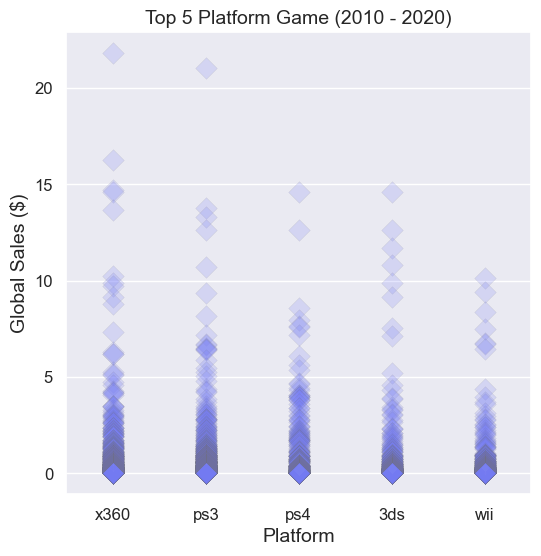

In [82]:
plt.figure(figsize=(6, 6))
sns.set_theme()
sns.stripplot(data=filtered_data, x="Platform", y="Global_Sales", jitter=False, s=11, marker="D", linewidth=0.3, alpha=0.2, color='#787FF6')
plt.title('Top 5 Platform Game (2010 - 2020)', fontdict={"fontsize":14})
plt.xlabel('Platform', fontdict={"fontsize":14})
plt.ylabel('Global Sales ($)', fontdict={"fontsize":14})
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Statistical test

Considering that the data are not normally distributed, I used a non-parametric test because it generates more reliable results in this case than a parametric test. I applied the Kruskal-Wallis test because it is appropriate for handling a non-normal distribution (Devore, 2012, p.645).

I used the Scipy library and the 'kruskal()' function to perform this statistical test and the p-value (docs.scipy.org, n.d.).

*State the hypothesis:*
    
- $H_0$: There is no difference between the medians.

- $H_A$: There is difference between the medians. 

Below, the list in the variable 'groups' contains the 'Global_Sales' data for a particular 'Platform' in the 'filtered_data' dataframe using a loop. Then, I applied the 'kruskal()' function.

In [83]:
groups = [group['Global_Sales'] for name, group in filtered_data.groupby('Platform')]

kw_statistic, p_value = kruskal(*groups)

print(f"Kruskal-Wallis H-test Statistic: {kw_statistic:.4f}")
print("p-value:", p_value)

Kruskal-Wallis H-test Statistic: 69.6780
p-value: 2.6544521066141888e-14


Given the extremely low p-value (2.65e-14), lower than the significance level of 0.05, I can reject the null hypothesis, indicating that there is a statistically significant difference in global sales between at least two platforms.

To find these differences, I will perform Dunn's test, a non-parametric method for multiple comparisons usually used with the Kruskal-Wallis test (Terpilowski, 2019). I used the Scikit_posthocs library to call the '.posthoc_dunn()' function to perform Dunn's test on the same 'groups' variable used above (Terpilovski, n.d.).

In [84]:
posthoc_dunn = sp.posthoc_dunn([*groups])

print("\nPost-hoc Dunn's test:")
print(posthoc_dunn)


Post-hoc Dunn's test:
              1             2         3         4             5
1  1.000000e+00  1.151775e-10  0.000030  0.002304  6.391795e-15
2  1.151775e-10  1.000000e+00  0.199332  0.005491  5.302625e-02
3  3.008034e-05  1.993324e-01  1.000000  0.229859  5.394800e-03
4  2.303878e-03  5.490576e-03  0.229859  1.000000  1.994177e-05
5  6.391795e-15  5.302625e-02  0.005395  0.000020  1.000000e+00


**Question answer:** 

Considering the period between 2010 to 2020, I found that the top 5 platforms/consoles leaders in sales around the world are: PS3, X360, 3DS, Wii, and PS4. In addition, with 95% confidence, the first two platforms/consoles (PS3 and X360) had statistically significantly higher sales than the others. At the same time, the other three did not have a difference in their sales medians.

---

# A panorama of global sales from 1980 to 2020

This part complements parts 2 and 1, in which I propose to make comparisons between two periods (from 1980 and from 2010, both until 2020), assessing platforms and games sold. My goal with it is to draw more solid conclusions regarding this dataset and the principal question posed by the retail company, which is asking for a sales strategy for their upcoming Winter season.

I used the '.groupby()' and '.nlargest()' functions to filter the data. Then, I used matplotlib to create visualizations to facilitate the comparison. The conclusion for this part is at the end of this section.

## 1980 - 2020

### Top 5 Platforms

In [85]:
platform_from1980 = df_int.groupby('Platform')['Global_Sales'].sum()
platform_from1980

Platform
2600      86.57
3do        0.10
3ds      257.92
dc        15.97
ds       803.73
gb       254.42
gba      305.62
gc       197.14
gen       28.36
gg         0.04
n64      218.21
nes      251.07
ng         1.44
pc       256.21
pcfx       0.03
ps       727.41
ps2     1233.46
ps3      931.15
ps4      314.23
psp      289.79
psv       53.82
sat       33.59
scd        1.87
snes     200.05
tg16       0.16
wii      891.74
wiiu      82.16
ws         1.42
x360     961.39
xb       252.09
xone     159.44
Name: Global_Sales, dtype: float64

In [86]:
top_platforms_from1980 = platform_from1980.nlargest(5)
top_platforms_from1980

Platform
ps2     1233.46
x360     961.39
ps3      931.15
wii      891.74
ds       803.73
Name: Global_Sales, dtype: float64

### Top 5 Games

In [87]:
games_names_from1980 = df_int.groupby('Name')['Global_Sales'].sum()
games_names_from1980

Name
'98 koshien                                      0.41
.hack//g.u. vol.1//rebirth                       0.17
.hack//g.u. vol.2//reminisce                     0.23
.hack//g.u. vol.2//reminisce (jp sales)          0.16
.hack//g.u. vol.3//redemption                    0.17
                                                 ... 
zumba fitness rush                               0.18
zumba fitness: world party                       0.46
zwei!!                                           0.02
zyuden sentai kyoryuger: game de gaburincho!!    0.05
¡shin chan flipa en colores!                     0.14
Name: Global_Sales, Length: 11397, dtype: float64

In [88]:
top_games_from1980 = games_names_from1980.nlargest(5)
top_games_from1980

Name
wii sports            82.53
grand theft auto v    56.57
super mario bros.     45.31
tetris                35.84
mario kart wii        35.52
Name: Global_Sales, dtype: float64

## 2010 - 2020

### Top 5 Platforms

In [89]:
platform_from2010 = df_from2010.groupby('Platform')['Global_Sales'].sum()
platform_from2010

Platform
3ds     257.92
ds      124.13
pc      121.91
ps2       6.10
ps3     587.69
ps4     314.23
psp      63.99
psv      53.82
wii     223.20
wiiu     82.16
x360    550.50
xone    159.44
Name: Global_Sales, dtype: float64

In [90]:
top_platforms_from2010 = platform_from2010.nlargest(5)
top_platforms_from2010

Platform
ps3     587.69
x360    550.50
ps4     314.23
3ds     257.92
wii     223.20
Name: Global_Sales, dtype: float64

### Top 5 Games

In [91]:
games_names_from2010 = df_from2010.groupby('Name')['Global_Sales'].sum()
games_names_from2010

Name
.hack//link                                      0.14
.hack: sekai no mukou ni + versus                0.03
1/2 summer +                                     0.01
10 minute solution                               0.08
100 classic games                                0.04
                                                 ... 
zumba fitness 2                                  2.81
zumba fitness core                               0.11
zumba fitness rush                               0.18
zumba fitness: world party                       0.46
zyuden sentai kyoryuger: game de gaburincho!!    0.05
Name: Global_Sales, Length: 3278, dtype: float64

In [92]:
top_games_from2010 = games_names_from2010.nlargest(5)
top_games_from2010

Name
grand theft auto v                56.57
call of duty: modern warfare 3    30.59
call of duty: black ops ii        29.40
call of duty: black ops           29.19
call of duty: ghosts              27.40
Name: Global_Sales, dtype: float64

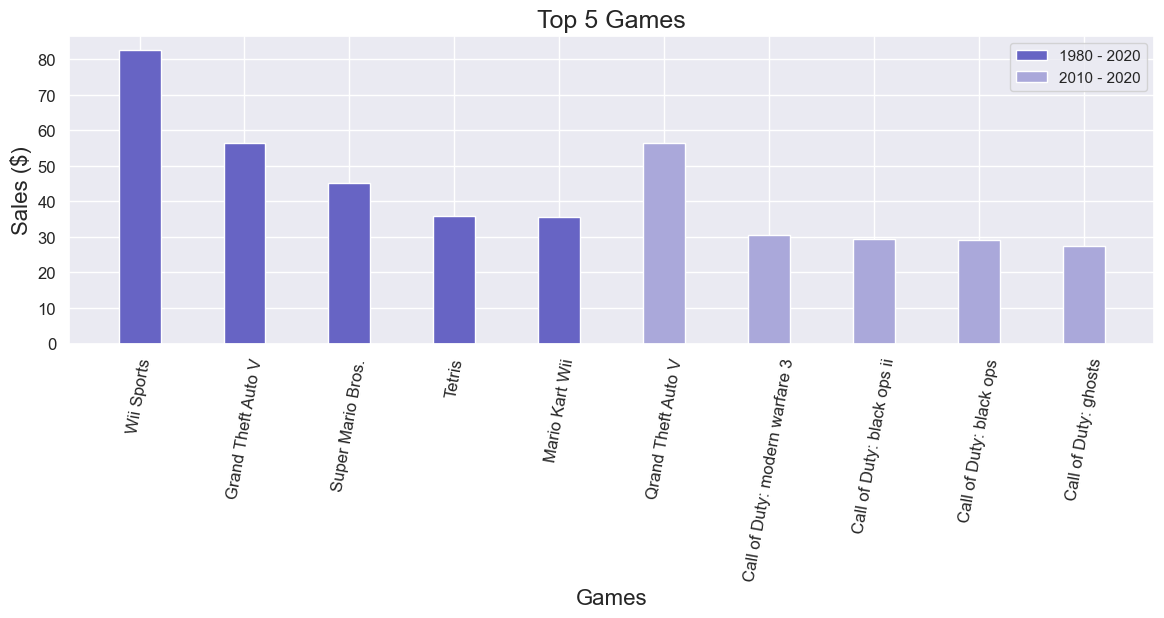

In [99]:
data = [
    ["Wii Sports", 82.53, 0],
    ["Grand Theft Auto V", 56.57, 0],
    ["Super Mario Bros.", 45.31, 0],
    ["Tetris", 35.84, 0],
    ["Mario Kart Wii", 35.52, 0],
    ["Qrand Theft Auto V", 0, 56.57],
    ["Call of Duty: modern warfare 3", 0, 30.59],
    ["Call of Duty: black ops ii", 0, 29.40],
    ["Call of Duty: black ops", 0, 29.19],
    ["Call of Duty: ghosts", 0, 27.40],
]
headers = ["Games", "1980 - 2020", "2010 - 2020"]

parameters = [row[0] for row in data]
values = [row[1] for row in data]
values_1 = [row[2] for row in data]


plt.figure(figsize=(14, 4))
bar_width = 0.4
index = np.arange(len(parameters))

plt.bar(index + bar_width, values, width=bar_width, label=headers[1], color='#6764C4')
plt.bar(index + bar_width, values_1, width=bar_width, label=headers[2], color="#AAA8DA")

plt.title('Top 5 Games', fontdict={"fontsize":18})
plt.xlabel('Games', fontdict={"fontsize":16})
plt.ylabel('Sales ($)', fontdict={"fontsize":16})
plt.xticks(index + bar_width, parameters)
plt.legend(loc='upper right')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(rotation=80)
plt.show()

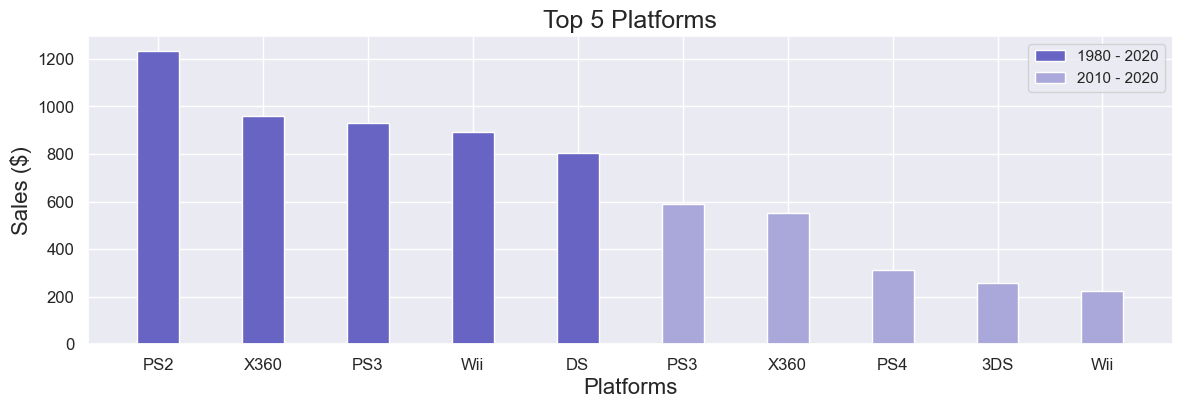

In [100]:
data = [
    ["PS2", 1233.46, 0],
    ["X360", 961.39, 0],
    ["PS3", 931.15, 0],
    ["Wii", 891.74, 0],
    ["DS", 803.73, 0],
    ["PS3", 0, 587.69],
    ["X360", 0, 550.50],
    ["PS4", 0, 314.23],
    ["3DS", 0, 257.92],
    ["Wii", 0, 223.20],
]
headers = ["Platforms", "1980 - 2020", "2010 - 2020"]

parameters = [row[0] for row in data]
values = [row[1] for row in data]
values_1 = [row[2] for row in data]


plt.figure(figsize=(14, 4))
bar_width = 0.4
index = np.arange(len(parameters))

plt.bar(index + bar_width, values, width=bar_width, label=headers[1], color='#6764C4')
plt.bar(index + bar_width, values_1, width=bar_width, label=headers[2], color="#AAA8DA")

plt.title('Top 5 Platforms', fontdict={"fontsize":18})
plt.xlabel('Platforms', fontdict={"fontsize":16})
plt.ylabel('Sales ($)', fontdict={"fontsize":16})
plt.xticks(index + bar_width, parameters)
plt.legend(loc='upper right')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**Conlusion:**

Considering the graphic of the Top 5 games, we see that **Grand Theft Auto V** is highly ranked in both periods (1980 - 2020 and 2010 - 2020), suggesting that this game is very popular among consumers and has an excellent chance of continuing to be sold. On the other hand, the other games from 1980 to 2020 did not endure from 2010 to 2020, which had the rank occupied by the franchise game **Call of Duty**, indicating other options that could be sold in the upcoming seasons.

When considering platforms, we notice variations in console versions. However, overall, the top 5 platforms in both periods were dominated by major video game companies, namely PlayStation, Microsoft, and Nintendo, with PlayStation leading the market, particularly with the **PS3** version. Thus, these products might help increase sales, including selling games compatible with these consoles. 

# Part 3

### **• Why you chose the specific methods to engineer the data and how you achieved this in python (Part 1/Part 2)**

Before I engineer the data to answer the questions from parts 1 and 2, I commenced with the Exploratory Data Analysis (EDA) to identify the data structure, type, shape, summary statistics, missing values, etc. I utilized the .describe() method to obtain information about the descriptive statistical parameters related to measures of central tendency such as mean and median, and related to dispersion such as standard deviation, range, and interquartile range. With this information, I discerned that the dataset is skewed and does not follow a normal distribution.

After discovering that I needed to clean the data due to the result of the .isnull() method, I opted to impute using the interpolation method because this approach is more robust to outliers than using the median. Regarding the imputation of categorical data, I attempted to use the nearest neighbor model, but it did not yield good performance because the missing data accounted for approximately 40% of the dataset, rendering it an unreliable process. Therefore, I converted the NaN values to 'Unknown' (a new category) when I had to work with this feature, but I emphasized the importance of updating this feature.

Considering parts 1 and 2, I primarily employed methods for grouping and filtering, such as .sort_values(), .value_counts(), .groupby(), and .get_group(). These methods were crucial for obtaining the specific portions of the data necessary to answer the questions. For instance, in the first question of part 1, I utilized '.groupby()', to retrieve the top 5 games with the highest sales numbers. In addition, in both parts, I employed boolean masks with the '>=' sign to filter the 'Year_of_Release' column, ensuring that only values satisfying the condition '>=' were returned as 'True'. 

These procedures were essential to select specific parts of the dataset that I understood could be suitable for completing the tasks, since this dataset is considerable large. 

### **• Why you chose your specific visualizations to illustrate each answer (Part 1/Part 2)**


**Part 1:**
    
<u>Question 1:</u> For the initial question, I chose a bar chart for its ability to reflect quantities of variables across categories. Utilizing horizontal bars, which are commonly recommended for visualizing data ranks, ensures quick comprehension by the audience.  
    
<u>Question 2:</u> I opted for a scatterplot to depict the relationship between North American and Japanese sales due to its widespread usage in illustrating correlations between two numerical variables. Moreover, the interpretation becomes notably straightforward, particularly in cases of high correlation coefficients.
    
<u>Question 3:</u> For this question, I used a dot plot to visualize the occurrences of the top 4 genres in the dataset. I chose this option as an alternative to bar charts, which are also useful for expressing amounts, occurrences, and frequency. Then, I used the violin plot, which, in my opinion, was a good option to represent distribution without using the conventional histogram. Moreover, this plot allowed me to understand the trend of the genres through the years of release.
    
<u>Question 4:</u> Considering that in this task I had to compare two values of mean and median for two different periods of time, I decided to use a grouped bar chart because it allows a direct comparison between these two groups, resulting in a straightforward interpretation of the results. In addition, this type of visualization is indicated for summary statistics like mean and median.

<u>Question 5:</u> In this visualization, I opted to use a different type of visualization to enhance the variety among all the visuals and keep the audience engaged. I used a word cloud chart, commonly used to represent the frequency of words, similar to a bar chart. In this type of chart, the size of each word corresponds to its frequency in the dataset. This option was suitable for this question because I needed to represent that a significant amount of that feature was missing, and as a result, the 'Unknown' word took up a larger portion of the chart.
    
    
**Part 2:**

In this part, I used a strip plot because it allows the comparison between the 'Platform' categories simultaneously without overlapping each other, and it displays the distribution of the points, meaning that we can immediately see which category is responsible for higher sales. Moreover, this visual can add variability among visualizations and make the audience interested.

### **• What design decisions you made for each visualization (for example, but not only: colour, font, titles, size, text position, font size etc) (Part 1/Part 2)**

Given that these visualizations will be viewed by the company's CTOs, a demographic typically aged 35 to 60 who prefer straightforward and easy-to-understand visuals, it's crucial to ensure the text is large, easily legible, and promptly conveys the analysis results. With this in mind, I have designed the visualizations focusing on large font sizes and minimal text. I have also chosen colours that maintain excellent contrast, ensuring the graphics are readily understandable.

I applied the design principles taught in class, such as using a consistent palette of blue hues across all visualizations to maintain unity and reinforce the overarching theme of video game sales. Similarly, employing the same font type and size contributes to coherence and enhances the overall consistency of the visuals. I standardized the title for all visualizations, keeping it in the same position (center top) and as short as possible while communicating the chart's content. 

 
**Part 1:**

<u>Question 1:</u> I utilized a muted blue color to accentuate the contrast with the negative space, thereby enhancing the clarity of the world's highest-selling game. Employing a larger font size and concise text aids in effortless readability.
    
By applying the <u>movement</u> principle of design and taking into account Western culture, I structured the visuals for a seamless left-to-right, top-to-bottom reading flow. As a result, crucial information, such as the identity of the highest-selling game globally, is strategically positioned in the top-left corner.
    
<u>Question 2:</u> In this case, I applied the <u>emphasis</u> principle of design by implementing the alpha parameter to imbue each data point with transparency. This enables the audience to discern the concentration of sales and enhances their understanding of the relationship between two countries. Darker shades in a region indicate higher occurrences, emphasizing that sales amount. 
    
<u>Question 3:</u> The dot and violin charts were chosen to bring simplicity and <u>variety</u> to the visualizations. Although I could have used a bar chart, it might have resulted in more of the same, potentially compromising the audience's engagement. Additionally, the distributions were well presented side by side instead of overlapping each other, resulting in a clearer analysis of each game genres.
    
<u>Question 4:</u> I used a grouped bar chart to represent the means and medians for two different periods of time. I chose this chart type because the comparisons are straightforward for anyone. By using the <u>pattern</u>, another principle of design that can highlight differences by disrupting the pattern, we can easily discern which period had better sales. 
      
<u>Question 5:</u> In this case, I opted to use an unconventional visualization to increase audience engagement, introducing variety throughout all visualizations. I utilized the principles of design, focusing on <u>proportion</u> and making important information evident, particularly emphasizing the necessity of improving the quality of the 'Developer' variable.

**Part 2:**

This part is complementary to Part 1, and because of this, I decided to use a purple color to complement the blue color used in Part 1. This choice, as well as the use of a different marker shape also brought <u>unity</u> and <u>variety</u> throughout the visualizations. I opted to use transparency again to emphasize occurrences while also providing comparisons among the platforms.

### **• What your rationale is for the visualization created in Part 2 and how your question enhances the information and insight gained in the scenario (Part 2)**

I purposed to answer what are the top 5 platforms/consoles that resulted in the highest sales from 2010 to 2020 because the platforms and consoles are used to run the games, which suggests that if a customer buys a console, there is a high chance of buying at least one game as these products are related to each other. In addition, I chose this period to try to bring the most up-to-date data possible, at least until 2020, when there were the last records in the dataset.

To attempt to answer this question, I created a strip plot to visualize sales for each platform from 2010 to 2020. I found that, considering a 95% confidence interval, the top 5 platforms in global sales were PS3 and X360, with statistically significantly higher sales than the others (3DS, Wii, and PS4).

However, I wanted to gain insight into the games and platforms sold in two periods (1980 - 2020 and 2010 - 2020) I believed it could enhance the overall analysis, as the purchase of consoles is related to the games as well. I achieved this by creating two simple bar charts: one for the Top 5 Games and another for the Top 5 Platforms. The results showed that Grand Theft Auto V was the most popular in both periods, and the franchise game Call of Duty was the most popular from 2010 to 2020. This suggests that these games are highly recommended to boost sales in the upcoming season. To complement this information, the results of the Top 5 Platforms from 1980 to 2020 align with those found in the previous period (2010 - 2020), with PlayStation leading sales, followed by Microsoft and Nintendo.

Considering the above, it is evident that platforms from PlayStation and Microsoft have successfully catered to their respective games (Grand Theft Auto V and Call of Duty franchise) during the period from 2010 to 2020. However, there is a clear opportunity for growth, as the platforms from Nintendo appeared in the top sales but not in the top sales for games. This underscores the importance of identifying the most sold games for the Nintendo platform, which could open up a new customer base and serve as a key focus for our marketing strategies.

# Project Conclusion

After conducting this analysis, I can confidently recommend that the company considers investing in the following platforms/consoles: PS3, X360, PS4, 3DS, and Wii, alongside titles such as Grand Theft Auto V and the Call of Duty franchise games. Moreover, further investigation is warranted to pinpoint the top games compatible with the 3DS and Wii, thereby maximizing sales opportunities.

Nevertheless, it's crucial to emphasize that these analyses are based on data up until 2020. Since then, new console versions and games have been introduced by various companies, potentially altering consumer preferences in the curnt t real scerio..


# References

Devore, J.L. (2012). *Probability and Statistics for Engineering and the Sciences*. 8th ed. Boston, MA: Brooks/Cole Pub Co.

docs.scipy.org. (n.d.). scipy.stats.sem — SciPy v1.12.0 Manual. [online] Available at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html#scipy.stats.sem [Accessed 29 Mar. 2024].

matplotlib.org. (n.d.). API Reference — Matplotlib 3.8.3 documentation. [online] Available at: https://matplotlib.org/stable/api/index.html# [Accessed 24 Mar. 2024].

OpenAI. (2024). ChatGPT (GPT-3.5 version) [Large language model]. 
https://chat.openai.com/chat (https://chat.openai.com/chat. [Accessed 01 Apr. 2024])

PyPI. (2018). wordcloud. [online] Available at: https://pypi.org/project/wordcloud/. [Accessed20 Marr. 2024].

scikit-learn. (n.d.). 6.4. Imputation of missing values. [online] Available at: https://scikit-learn.org/stable/modules/impute.html#knnimpute. [Accessed 23 Mar. 2024].

seaborn.pydata.org. (n.d.). seaborn.boxplot — seaborn 0.11.1 documentation. [online] Available at: https://seaborn.pydata.org/generated/seaborn.boxplot.html. [Accessed 23 Mar. 2024].

seaborn.pydata.org. (n.d.). seaborn.jointplot — seaborn 0.13.2 documentation. [online] Available at: https://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn-jointplot [Accessed 30 Mar. 2024].

seaborn.pydata.org. (n.d.). Statistical estimation and error bars — seaborn 0.12.1 documentation. [online] Available at: https://seaborn.pydata.org/tutorial/error_bars.html. [Accessed 29 Mar. 2024].

Stef van Buuren (2018). *Flexible Imputation of Missing Data*, Second Edition. CRC Press.

Terpilowski, M.A. (2019). *scikit-posthocs: Pairwise multiple comparison tests in Python.* Journal of Open Source Software, 4(36), p.1169. doi:https://doi.org/10.21105/joss.01169.

Terpilovski, M. (n.d.). *scikit-posthocs: Statistical post-hoc analysis and outlier detection algorithms.* [online] PyPI. Available at: https://pypi.org/project/scikit-posthocs/. [Accessed 02 Apr. 2024]

Troyanskaya, O., Cantor, M., Sherlock, G., Brown, P., Hastie, T., Tibshirani, R., Botstein, D. and Altman, R.B. (2001). *Missing value estimation methods for DNA microarrays*. Bioinformatics, 17(6), pp.520–525. doi:https://doi.org/10.1093/bioinformatics/17.6.520.

Vu, D. (2023). *Python Word Clouds Tutorial: How to Create a Word Cloud*. [online] www.datacamp.com. Available at: https://www.datacamp.com/tutorial/wordcloud-python. [Accessed 01 Apr. 2024].

**Explanation of AI uses in this project:** 

I used the ChatGPT to refine ideas, find information about the topic, check for grammar usage, and get information about code usage. 